In [180]:
#import lib
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import math

In [181]:
train_df =  pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [182]:
#review data

In [183]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [185]:
#clean data
train_df =  pd.read_csv('train.csv', index_col="PassengerId")
test_df = pd.read_csv('test.csv', index_col="PassengerId")

In [186]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [188]:
#convert to categorical
train_df['Survived'] = train_df['Survived'].astype('category')
convert_features = ['Pclass','Sex','SibSp','Parch','Embarked']
for features in convert_features:
    train_df[features] = train_df[features].astype('category')
    test_df[features] = test_df[features].astype('category')

In [189]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [190]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


# Distribution

In [191]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [192]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [193]:
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [194]:
train_df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

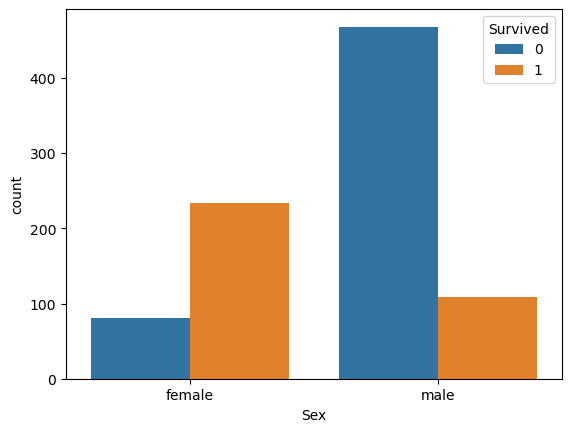

In [195]:
sns.countplot(data=train_df,x='Sex',hue = 'Survived')

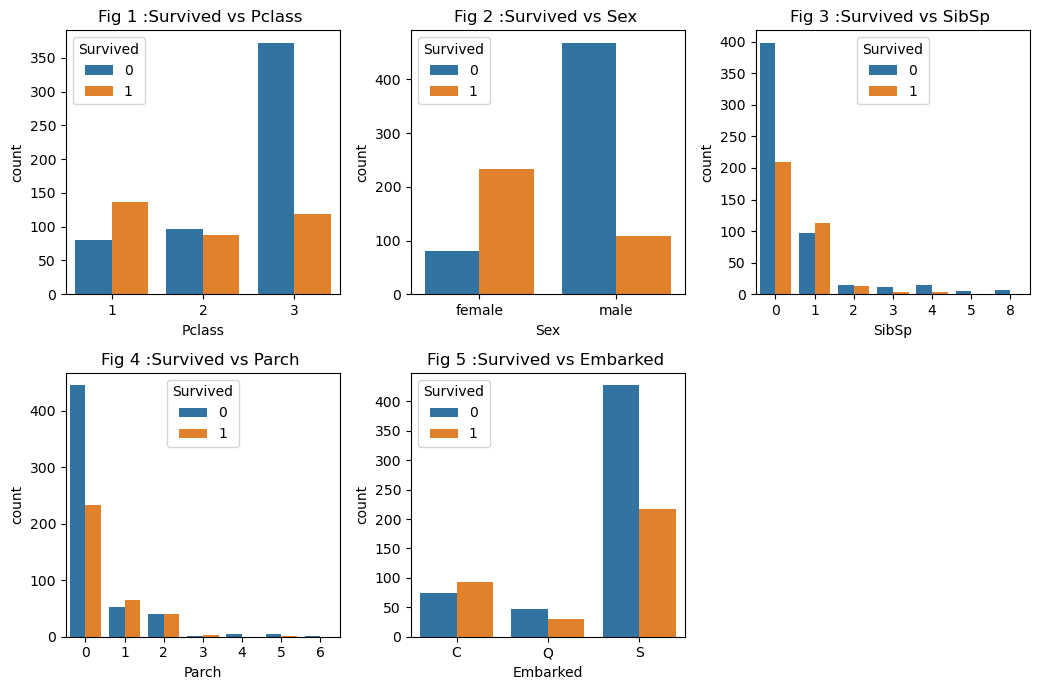

In [196]:
cols = ['Pclass','Sex','SibSp','Parch','Embarked']
n_cols = math.ceil(len(cols)/2)
n_rows = int(len(cols)/2)

fig,ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))
for i in range(n_rows):
    for j in range(n_cols):
        index = i*n_cols+j #index for list  'cols'
        if index < len(cols):
            ax_i = ax[i,j]
            sns.countplot(data=train_df,x=cols[index],hue = 'Survived',ax=ax_i)
            ax_i.set_title(f'Fig {index+1} :Survived vs {cols[index]} ')
ax.flat[-1].set_visible(False) #remove the extra plot
plt.tight_layout()


DEA for numerical

Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

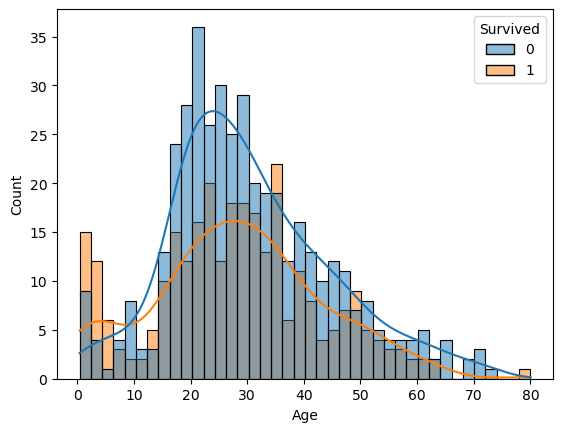

In [197]:
sns.histplot(data=train_df,x='Age',hue='Survived',bins=40,kde=True)

Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

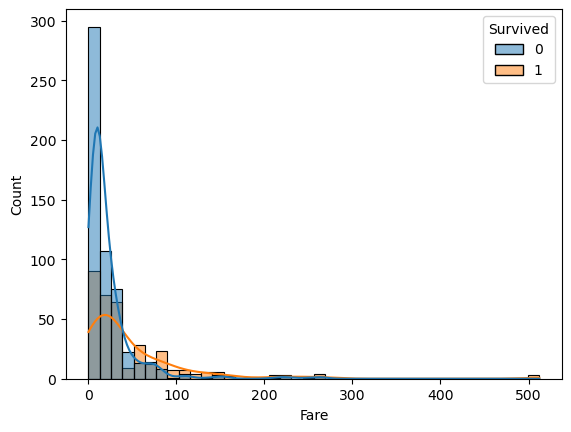

In [198]:
sns.histplot(data=train_df,x='Fare',hue='Survived',bins=40,kde=True)

<AxesSubplot:xlabel='Fare', ylabel='count'>

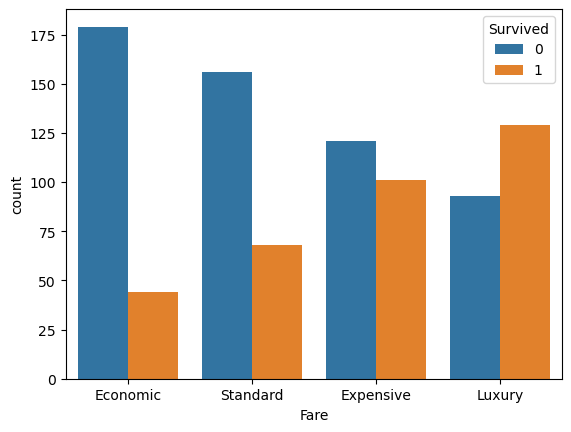

In [199]:
#plot 0-25, 25-50, 50-75, 75- 100

fare_categories = ['Economic','Standard','Expensive','Luxury']
quartile_data=pd.qcut(train_df['Fare'],4,labels = fare_categories)
    
sns.countplot(data=train_df,x=quartile_data,hue='Survived')

Engineer features

In [200]:
train_df['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [201]:
import  re #regular expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name:extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name:extract_title(name))

In [202]:
train_df['Title'].head()

PassengerId
1      Mr
2     Mrs
3    Miss
4     Mrs
5      Mr
Name: Title, dtype: object

In [203]:
def group_title(title):
    if title in ['Mr','Mrs', 'Miss','Master']:
        return title
    if  title =='Ms':
        return 'Miss'
    else:
        return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title:group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title:group_title(title))
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

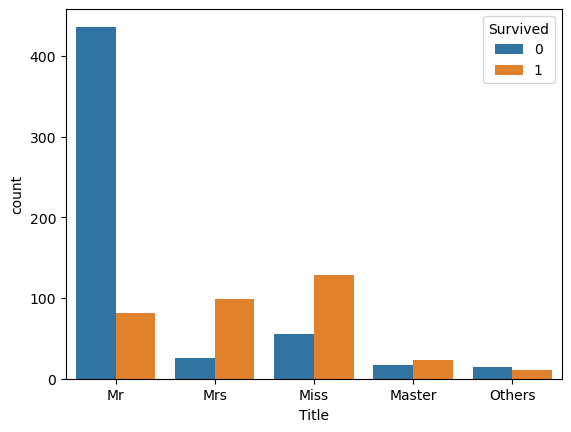

In [204]:
sns.countplot(data = train_df,x=train_df['Title'],hue = 'Survived')

Family

<AxesSubplot:xlabel='SibSp', ylabel='count'>

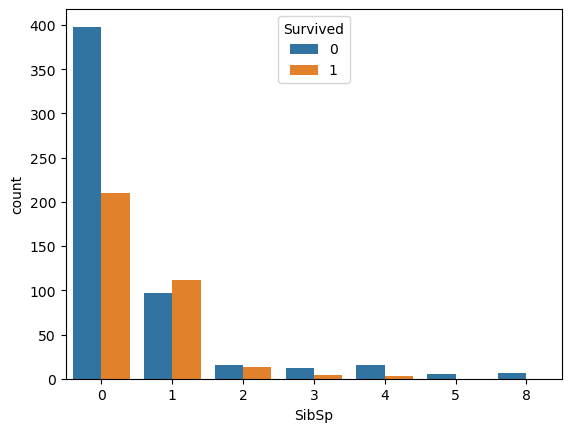

In [205]:
sns.countplot(data = train_df,x=train_df['SibSp'],hue = 'Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

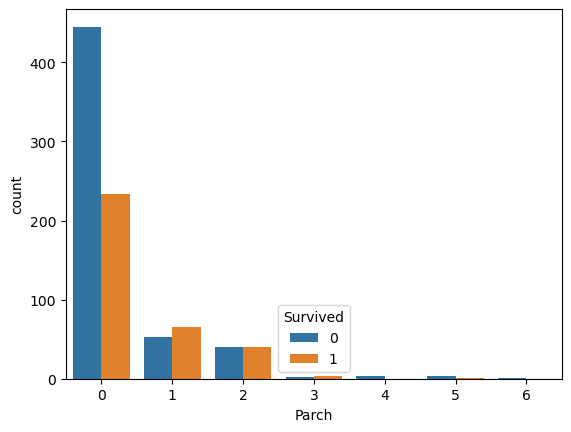

In [206]:

sns.countplot(data = train_df,x=train_df['Parch'],hue = 'Survived')

In [207]:
train_df['Family_size'] = train_df['SibSp'].astype(int)+train_df['Parch'].astype(int)+1
test_df['Family_size'] = test_df['SibSp'].astype(int)+test_df['Parch'].astype(int)+1

In [208]:
train_df['Family_Cat'] = pd.cut(train_df['Family_size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

<AxesSubplot:xlabel='Family_Cat', ylabel='count'>

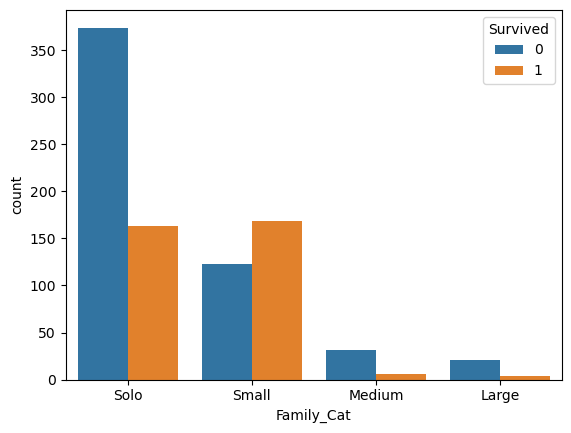

In [209]:
sns.countplot(data = train_df,x=train_df['Family_Cat'],hue = 'Survived')

In [210]:
train_df = train_df.drop(['SibSp','Parch'],axis=1)
test_df = test_df.drop(['SibSp','Parch'],axis=1)

In [211]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   Ticket       891 non-null    object  
 6   Fare         891 non-null    float64 
 7   Cabin        204 non-null    object  
 8   Embarked     889 non-null    category
 9   Title        891 non-null    object  
 10  Family_size  891 non-null    int32   
 11  Family_Cat   891 non-null    category
dtypes: category(5), float64(2), int32(1), object(4)
memory usage: 57.3+ KB


Data wappring

In [212]:
numerical_features =['Age','Fare']
cat_features =['Pclass','Sex','Embarked','Family_Cat']
col_features =  numerical_features + cat_features

In [220]:
def NumMissingValue(df,col_features):
    num_row = df.shape[0]
    for col in col_features:
        missing_value = df[col].isnull().sum()
        if(missing_value > 0):
            print(f'There {missing_value/num_row*100:.2f}% missing values in {col}')
            
NumMissingValue(train_df,col_features)

There 19.87% missing values in Age
There 0.22% missing values in Embarked


In [221]:
NumMissingValue(test_df,col_features)

There 20.57% missing values in Age
There 0.24% missing values in Fare


Filling missing value

In [225]:
median_age_by_sex_Pclass = train_df.groupby(['Sex','Pclass']).median()['Age']

In [226]:
median_age_by_sex_Pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [232]:
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [234]:
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [235]:
NumMissingValue(train_df,col_features)

There 0.22% missing values in Embarked


In [236]:
NumMissingValue(test_df,col_features)

There 0.24% missing values in Fare


In [256]:
#preprocessing
X = train_df[col_features]
y = train_df['Survived']
X_test = test_df[col_features]


In [257]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_transformer =Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [258]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,numerical_features),
    ('cat',cat_transformer,cat_features)
])

In [259]:
X = preprocessor.fit_transform(X) #-> X_train,X_val

In [260]:
X_test = preprocessor.fit_transform(X_test)

In [265]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [266]:
#train model
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()
model = model.fit(X_train,y_train)
print("The mean accuracy of the model is:",model.score(X_val,y_val)) 

The mean accuracy of the model is: 0.8100558659217877


In [267]:
#creating the objects
from sklearn.svm import SVC
svc_cv=SVC()

cv_dict = {0:'SVC'}
cv_models=[svc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

SVC Test Accuracy: 0.8226841448189761
